In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install --upgrade plotly

In [ ]:
#!pip install --upgrade plotly

In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as p
import plotly.express as px
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [ ]:
happiness=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/online-data-chapter-2-whr-2017.xlsx')


In [ ]:
happiness.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WVS rou

In [ ]:
## getting country in new variable to find the null values

country=happiness['country']

In [ ]:
happiness.isna().sum()

country                                                        0
year                                                           0
Life Ladder                                                    0
Log GDP per capita                                            35
Social support                                                12
Healthy life expectancy at birth                               9
Freedom to make life choices                                  34
Generosity                                                    92
Perceptions of corruption                                     84
Positive affect                                               17
Negative affect                                               11
Confidence in national government                            195
Democratic Quality                                           292
Delivery Quality                                             291
Standard deviation of ladder by country-year                   0
Standard deviation/Mean o

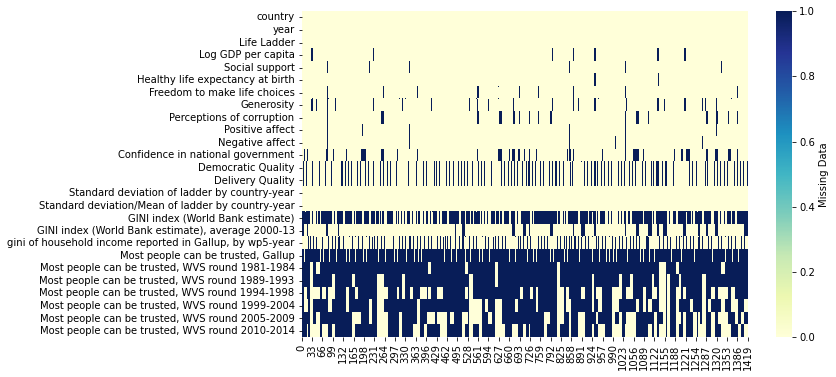

In [ ]:
## plotting graph to see the null values present in the data

plt.figure(figsize=(10,6))
sn.heatmap(happiness.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

## Observation:
Blue color shows the amount of null values present in the dataset. Data from column name 'Most people can be trusted' has most null values.

## Result:
The data from 1981 contains the most amount of null values maybe because of the data collection process or storing process might not be proper.

In [ ]:
happiness.drop("country", axis=1, inplace = True)  #to apply linear regression

In [ ]:
happiness=happiness.interpolate(methods='linear',limit_direction='both',axis=0)  # finding nan values so we can predict other values
#happiness

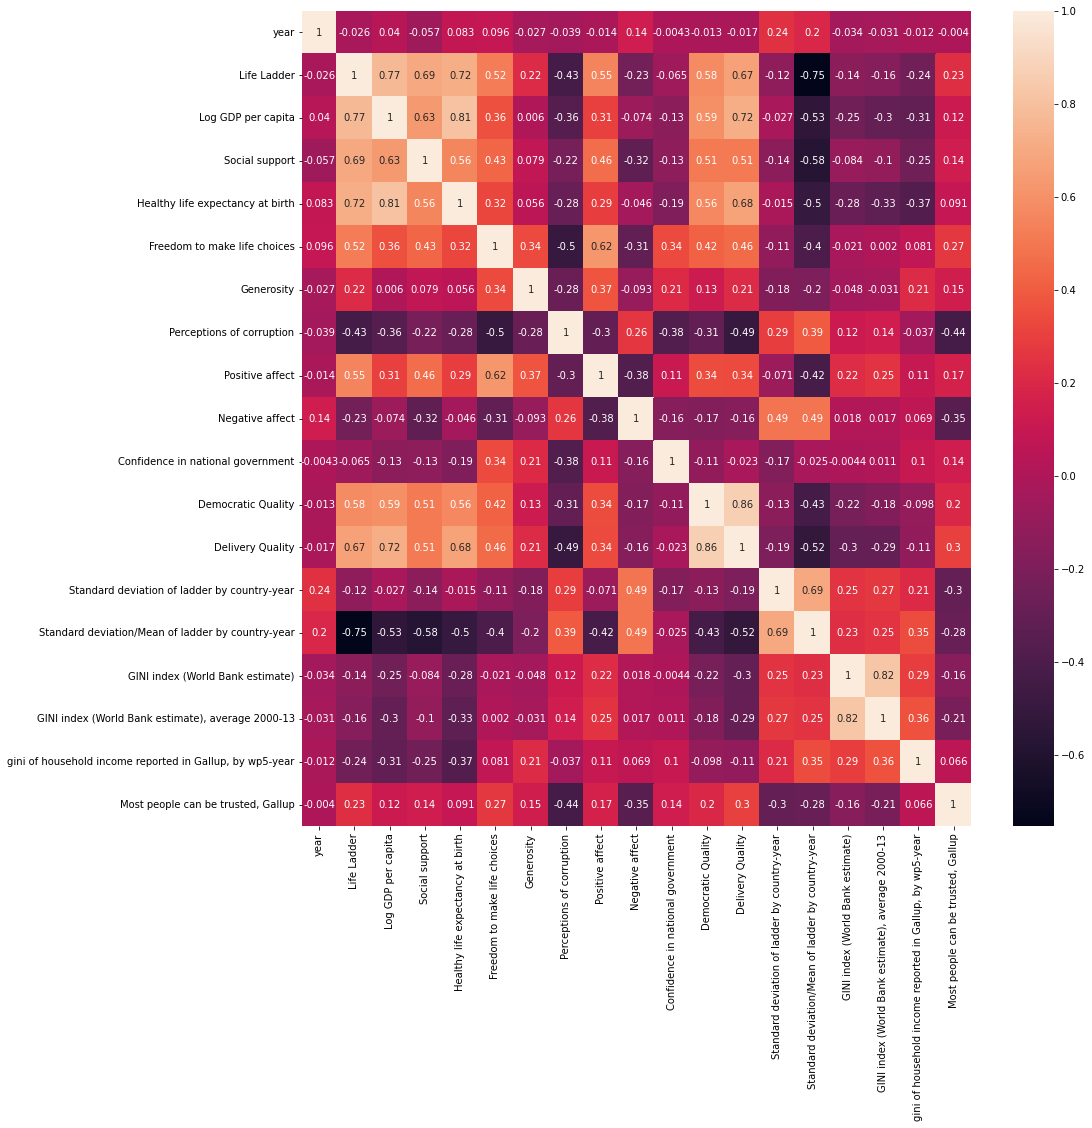

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15))
sn.heatmap(happiness.corr(),annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math

In [ ]:
corr_matrix = happiness.corr()
features = []
# we are appending column where the value of correlation is greater than 0.1
for feature, value in corr_matrix['Generosity'].iteritems():
    if abs(value) >= 0.1:
        features.append(feature)
    else:
        pass

In [ ]:
features.pop(0)

'Life Ladder'

In [ ]:
X = happiness[features]
y = happiness['Generosity']
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 28)

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) # fitting the data set 

LinearRegression()

In [ ]:
y_pred = linear_regressor.predict(X_test)  # predicting the new values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



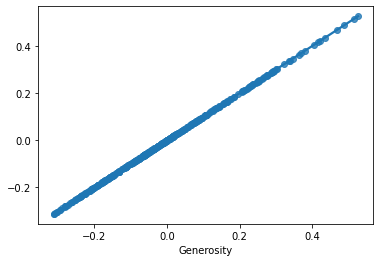

In [ ]:
sns.regplot(y_test, y_pred)

## Observed:
Points are throughout the plane but many points are close to the linear regression line. Mainly points from -0.2 to 0.2.

## Result:
Linear regression is not the right model to predict the value of generosity

In [ ]:
# Accuracy
print("The Accuracy Score of the model is", linear_regressor.score(X_test, y_test), "\nThe RScore of the model is", r2_score(y_test, y_pred))

The Accuracy Score of the model is 1.0 
The RScore of the model is 1.0


In [ ]:
# Evaluation Metrics
print("The MAE of the model is", mean_absolute_error(y_test, y_pred), "\nThe MSE of the model is", mean_squared_error(y_test, y_pred), "\nThe RMSE of the model is", math.sqrt(mean_squared_error(y_test, y_pred)))

The MAE of the model is 5.869657173160701e-16 
The MSE of the model is 5.219032574023622e-31 
The RMSE of the model is 7.224287213299054e-16


In [ ]:
# Intercept and weights

intercept = linear_regressor.intercept_
weights = linear_regressor.coef_

print("The intercept of the regression equation is", intercept, "\n\nThe weights of the equation are:\n", weights)

The intercept of the regression equation is -1.1835150914851766e-15 

The weights of the equation are:
 [ 1.45628111e-15  1.00000000e+00  2.49800181e-16 -3.33066907e-16
 -2.49800181e-16 -4.44089210e-16 -4.44089210e-16 -6.93889390e-17
  5.27355937e-16 -1.61329283e-16  7.21644966e-16  1.70002901e-16
  2.35922393e-16 -1.59594560e-16]


In [ ]:
# Prediction Function

def predictHappiness(regressor, values):
  equation = 0
  intercept = regressor.intercept_
  weights = regressor.coef_

  for i in range(len(values)):
    equation += weights[i]*values[i]
  equation += intercept

  print('The Happiness Index is', equation)

In [ ]:
happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,...,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,2011.303521,5.428571,9.202365,0.811446,61.904898,0.723249,-0.000185,0.753783,0.709614,0.260601,...,0.381616,0.389883,0.448770,0.232896,0.392804,0.268908,0.248115,0.276180,0.254359,0.234296
std,3.149570,1.121719,1.176594,0.118979,8.226723,0.146725,0.156589,0.184536,0.107364,0.082553,...,0.078594,0.086568,0.101575,0.095574,0.127138,0.098970,0.095919,0.125255,0.146975,0.141148
min,2005.000000,2.687553,6.354652,0.290184,36.167667,0.257534,-0.324367,0.035198,0.362498,0.083426,...,0.244800,0.210980,0.223470,0.066618,0.176535,0.066020,0.048720,0.075872,0.038242,0.031518
25%,2009.000000,4.600384,8.314003,0.750811,56.730636,0.627637,-0.106881,0.697359,0.622372,0.202725,...,0.320457,0.321267,0.375984,0.164546,0.270073,0.223553,0.194250,0.169963,0.148230,0.110621
50%,2011.000000,5.317440,9.377479,0.834151,63.732859,0.739609,-0.018780,0.807724,0.718179,0.250367,...,0.365323,0.373936,0.428935,0.216128,0.406129,0.292383,0.240475,0.244198,0.206897,0.214644
75%,2014.000000,6.269866,10.147347,0.904144,67.877838,0.838155,0.088782,0.880089,0.801560,0.307568,...,0.426220,0.437450,0.508784,0.281941,0.509766,0.332638,0.291684,0.380285,0.337701,0.329065
max,2016.000000,8.018934,11.815410,0.987343,76.408699,0.983803,0.542249,0.983276,0.943621,0.704590,...,0.647900,0.625950,0.997589,0.640332,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


In [ ]:
#predictHappiness(linear_regressor, [6.9917593	,7.89986897	,0.921002865	,1.7709198	,0.868496716	,0.81657359	,0.681191266,	0.826555312	])

In [ ]:
happiness.isna().sum()

year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI index (World Bank estimate)                            0
GINI ind

In [ ]:
happiness.to_csv('Happiness_clean.csv')

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

happiness['country']=country
fig = px.scatter(happiness, x="Positive affect", y="Generosity",color='Life Ladder',
            hover_name="country", log_x=True, size_max=100)
fig.show()

## Observed :
- Most country have positive affect of the factors mentined in the data.
- As we go from left to right we can see the life ladder increases and it increases with generosity.
- Most country have have positive affect but have less generosity
- Countries with smaller area/region have more life ladder, generosity and positive affect (Netherlands,Ireland,Switzerland,Thailand,etc.)
- Countries like United Kingdom and United States of America, Canada have low generosity and positive affect but still maintain a high life ladder.


In [ ]:
import plotly.express as px
#import numpy as np
fig = px.sunburst(happiness, path=['country'], values='Generosity',
                  color='GINI index (World Bank estimate), average 2000-13',
                  color_continuous_scale='RdBu')
fig.show()

## Observed:
- Countries are placed in order of there generosity (increasing order) while the colors represents the gini index of the country.
- countries with more generosity have less gini index where Thailand has 3.44 generosity with 0.4 gini index which shows that even with more generous people the inequality in income is still there for the year 2000-2013.

- countries like Netherland have 2.01 and have a very low gini index(0.29) 
  - may implies that the netherland was happy country where people want to live from 2000 to 2013

In [ ]:
px.scatter(happiness, x="Log GDP per capita", y="Generosity", animation_frame="year",
           animation_group="country",
           size="Life Ladder", color="country", hover_name="country",
           trendline= "ols")

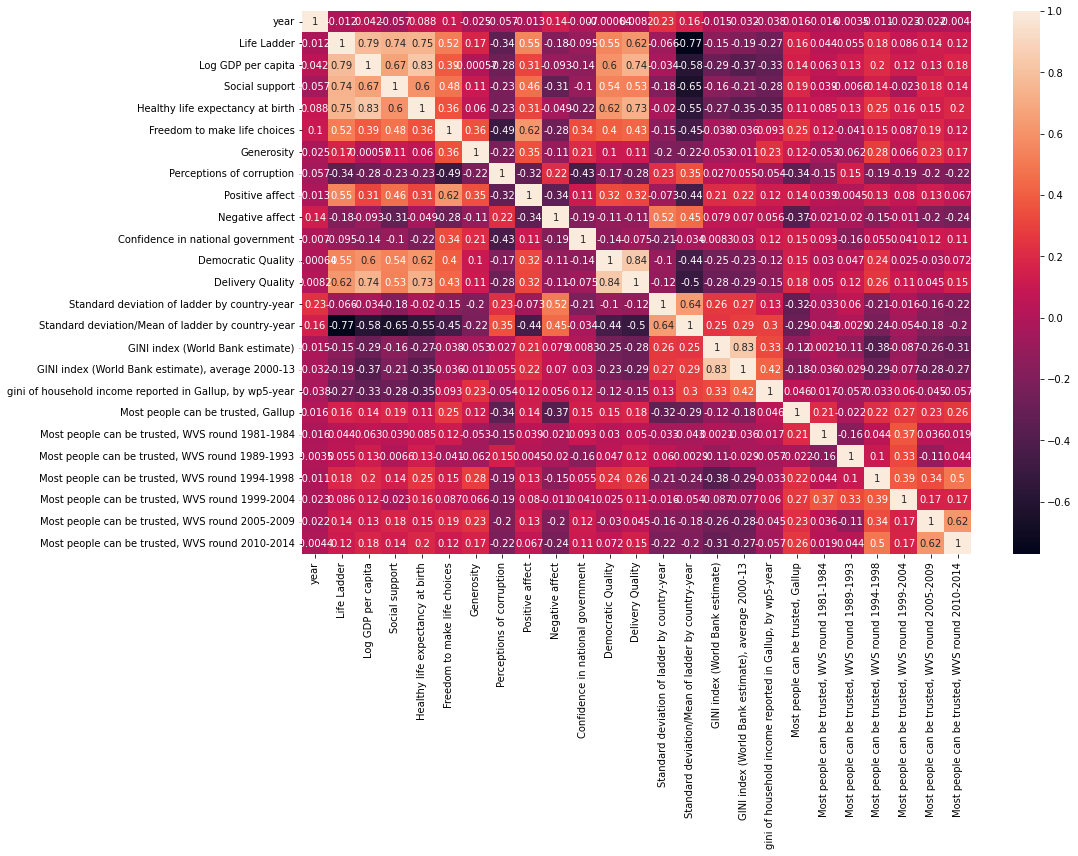

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(happiness.corr("spearman"), annot = True)

## Observed:
- Correlation for the variables in the data we have is nearly zero with every variable. 
- This maybe because the data in the last columns have been filled using linear regression. 


In [ ]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   year                                                      1420 non-null   float64
 1   Life Ladder                                               1420 non-null   float64
 2   Log GDP per capita                                        1420 non-null   float64
 3   Social support                                            1420 non-null   float64
 4   Healthy life expectancy at birth                          1420 non-null   float64
 5   Freedom to make life choices                              1420 non-null   float64
 6   Generosity                                                1420 non-null   float64
 7   Perceptions of corruption                                 1420 non-null   float64
 8   Positive affect   

In [ ]:
import pycountry
happiness['code'] = happiness['country']

#Create a look up with required values
lookup_table = {country.name: country.alpha_3 for country in pycountry.countries}

#replace the alpha-2 column with lookup values.
happiness = happiness.replace({'code':lookup_table})
happiness


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",country,code
0,2008.0,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,...,0.441906,0.286315,0.270073,0.223553,0.243243,0.232000,0.174058,0.179286,Afghanistan,AFG
1,2009.0,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,0.441906,0.286315,0.270073,0.223553,0.243243,0.232000,0.174058,0.179286,Afghanistan,AFG
2,2010.0,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,0.327318,0.275833,0.270073,0.223553,0.243243,0.232000,0.174058,0.179286,Afghanistan,AFG
3,2011.0,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,...,0.336764,0.255229,0.270073,0.223553,0.243243,0.232000,0.174058,0.179286,Afghanistan,AFG
4,2012.0,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,...,0.344540,0.234625,0.270073,0.223553,0.243243,0.232000,0.174058,0.179286,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2012.0,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,...,0.487203,0.148151,0.453548,0.098058,0.133333,0.116683,0.110429,0.082942,Zimbabwe,ZWE
1416,2013.0,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,...,0.555439,0.148151,0.453548,0.098058,0.133333,0.116683,0.110429,0.082942,Zimbabwe,ZWE
1417,2014.0,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,...,0.601080,0.148151,0.453548,0.098058,0.133333,0.116683,0.110429,0.082942,Zimbabwe,ZWE
1418,2015.0,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,...,0.655137,0.148151,0.453548,0.098058,0.133333,0.116683,0.110429,0.082942,Zimbabwe,ZWE


In [ ]:
happiness[happiness['Generosity']==happiness['Generosity'].min()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",country,code
468,2011.0,5.37204,10.189661,0.851555,70.764832,0.528126,-0.324367,0.941153,0.591372,0.322791,...,0.325479,0.164458,0.448208,0.324439,0.298568,0.38266,0.11412,0.094501,Greece,GRC


In [ ]:
happiness[happiness['Generosity']==happiness['Generosity'].max()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",country,code
1255,2014.0,6.985464,9.614202,0.933167,65.491379,0.899846,0.542249,0.919834,0.81137,0.168738,...,0.456662,0.24708,0.524418,0.149693,0.188624,0.111084,0.415082,0.324913,Thailand,THA


## Observed :
- From above two dataframe we can infer that in year 2014 Thailand had the most generosity for the time frame from 2008 till 2016.
- And in year 2011 Greece is the country with least generosity for the time frame 2008 till 2016. 
- Greece has more log gdp than Thailand but with a very low margin of 0.5
- Perception of corruption is similar in both the countries
- Whereas the democratic quality varies by 1.22 (0.35-(-0.87))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = happiness['code'],
    z = happiness['Perceptions of corruption'],
    text = happiness['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5
))

fig.update_layout(
    title_text='Perceptions of corruption',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [ ]:
happiness[happiness['Perceptions of corruption']==happiness['Perceptions of corruption'].max()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",country,code
523,2010.0,4.725132,10.005591,0.895694,65.302437,0.513835,-0.155153,0.983276,0.655816,0.234813,...,0.322204,0.133168,0.331434,0.333273,0.224615,0.387546,0.288842,0.442912,Hungary,HUN


## Observed: 
Hungary is the country with the most perception of corruption but the gini index in very low which show that the income inequality is there. 


In [ ]:
happiness = happiness.drop(happiness.iloc[:, -8:-2],axis = 1)

In [ ]:
happiness.isna().sum()

year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI index (World Bank estimate)                            0
GINI ind

In [ ]:
happiness = happiness.interpolate(method ='linear', limit_direction ='both')

In [ ]:
happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
0,2008.0,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,...,-1.962724,-1.665877,1.774662,0.476600,0.2896,0.305000,0.441906,0.286315,Afghanistan,AFG
1,2009.0,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,-2.082451,-1.647945,1.722688,0.391362,0.2896,0.305000,0.441906,0.286315,Afghanistan,AFG
2,2010.0,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,-2.015700,-1.630097,1.878622,0.394803,0.2896,0.305000,0.327318,0.275833,Afghanistan,AFG
3,2011.0,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,...,-1.943686,-1.620443,1.785360,0.465942,0.2896,0.305000,0.336764,0.255229,Afghanistan,AFG
4,2012.0,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,...,-1.855898,-1.435541,1.798283,0.475367,0.2896,0.305000,0.344540,0.234625,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2012.0,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,...,-1.117682,-1.477044,1.853195,0.373997,0.5462,0.516475,0.487203,0.148151,Zimbabwe,ZWE
1416,2013.0,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,...,-1.031373,-1.471021,1.964805,0.418918,0.5462,0.516475,0.555439,0.148151,Zimbabwe,ZWE
1417,2014.0,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,...,-0.962947,-1.468772,2.079248,0.496899,0.5462,0.516475,0.601080,0.148151,Zimbabwe,ZWE
1418,2015.0,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,...,-0.962947,-1.468772,2.198865,0.593776,0.5462,0.516475,0.655137,0.148151,Zimbabwe,ZWE


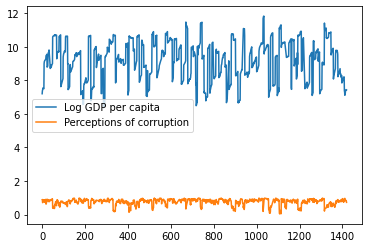

In [ ]:
happiness[["Log GDP per capita",'Perceptions of corruption']].plot()

In [ ]:
happiness[happiness['Log GDP per capita']==happiness['Log GDP per capita'].max()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
1034,2015.0,6.374529,11.81541,0.837909,67.806435,0.862227,0.010638,0.802267,0.703957,0.333934,...,0.226927,0.439904,2.256418,0.353974,0.30442,0.315208,0.653175,0.196118,Qatar,QAT


## Observed: 
- GPD is fluctuating where much whereas perception of corruption is not .
- But China had the most gpd in 2015.
- Data is manipulated 

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

find_outliers_IQR(happiness['Generosity'])

199     0.422174
492     0.406052
550     0.435711
551     0.425774
554     0.394788
555     0.457930
556     0.485928
690     0.449874
691     0.488335
692     0.426118
693     0.467435
792     0.454380
796     0.401817
1248    0.382709
1249    0.416864
1250    0.516131
1251    0.526510
1252    0.390533
1254    0.445884
1255    0.542249
1329    0.393323
Name: Generosity, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



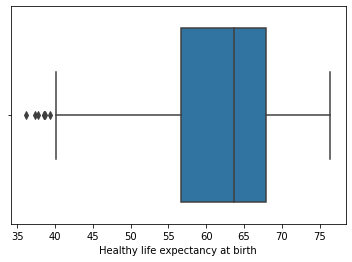

In [ ]:
sn.boxplot(happiness["Healthy life expectancy at birth"]);

In [ ]:
happiness[happiness["Healthy life expectancy at birth"]==happiness["Healthy life expectancy at birth"].max()]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
1114,2016.0,6.033481,11.300004,0.925128,76.408699,0.903736,0.124826,0.047311,0.823989,0.110942,...,0.746689,1.197774,1.302088,0.21581,0.281287,0.283598,0.428277,0.245686,Singapore,SGP


## Observed: 
- Singapore has the most life expectancy at birth 
- affecting factors maybe the less perception of corruption and more social support 
- Following are the outliers: 

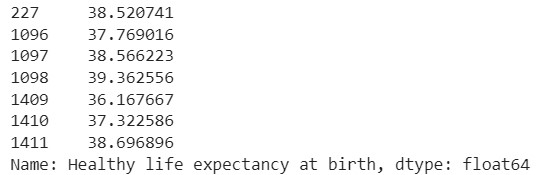








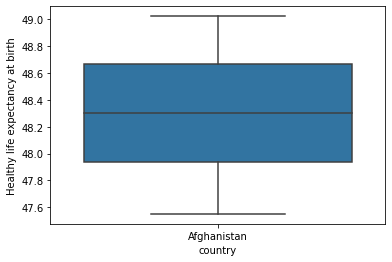

In [ ]:
sn.boxplot(x = happiness.loc[:5,'country'],y = happiness.loc[:5,"Healthy life expectancy at birth"])

## Observed:
- Outlier are not in the country 'Afghanistan'
- Mean of the life expectancy at birth for Afghanistan = 48.3

In [ ]:
Countryset = set(happiness["country"])

In [ ]:
largest = happiness.iloc[happiness["Log GDP per capita"].nlargest(10).index]
largest

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
1034,2015.0,6.374529,11.815410,0.837909,67.806435,0.862227,0.010638,0.802267,0.703957,0.333934,...,0.226927,0.439904,2.256418,0.353974,0.304420,0.315208,0.653175,0.196118,Qatar,QAT
1032,2011.0,6.591604,11.806471,0.857351,67.163177,0.904687,-0.036659,0.493033,0.760927,0.327790,...,0.102150,0.798254,2.320801,0.352084,0.316860,0.336653,0.572111,0.221903,Qatar,QAT
1033,2012.0,6.611299,11.797896,0.838132,67.335197,0.924334,0.111707,0.647650,0.765899,0.322181,...,0.205300,0.991341,2.173816,0.328803,0.310640,0.325930,0.556412,0.209010,Qatar,QAT
1031,2010.0,6.849653,11.757209,0.875922,66.989052,0.884840,0.056830,0.338415,0.719419,0.292937,...,0.112191,1.002939,2.023532,0.295421,0.323080,0.347376,0.454522,0.234795,Qatar,QAT
1030,2009.0,6.417824,11.682274,0.894493,66.820595,0.864992,0.189356,0.183798,0.677912,0.258085,...,0.160290,1.104877,1.624709,0.253156,0.329300,0.358099,0.466064,0.247688,Qatar,QAT
670,2006.0,6.075547,11.469510,0.918950,64.274185,0.769072,-0.280830,0.328158,0.845954,0.182275,...,-0.094505,0.414729,1.602858,0.263821,0.303069,0.301110,0.390875,0.107865,Kuwait,KWT
745,2016.0,6.967341,11.459249,0.941261,72.897324,0.882365,0.003843,0.356336,0.757950,0.192301,...,0.425100,0.459828,1.389065,0.199368,0.361912,0.317611,0.311804,0.156507,Luxembourg,LUX
744,2015.0,6.701571,11.446280,0.933605,72.539680,0.932256,0.036610,0.375390,0.757445,0.193050,...,0.942449,1.140894,1.505816,0.224696,0.358409,0.317611,0.292045,0.173934,Luxembourg,LUX
743,2014.0,6.891127,11.422652,0.875469,72.182037,0.937988,0.090894,0.366287,0.803084,0.170409,...,1.459797,1.821959,1.539558,0.223412,0.354906,0.317611,0.345527,0.191361,Luxembourg,LUX
740,2011.0,7.101400,11.419420,0.934091,71.111244,0.961831,0.090901,0.388171,0.836459,0.200137,...,1.454595,1.890735,1.565813,0.220494,0.324200,0.317611,0.358263,0.243643,Luxembourg,LUX


## Observed:
- Top GDP countries (regardless of the year) 
- Qatar and Luxembourg have the highest log gdp 
  - Qatar from 2009 till 2011
  - Luxembourg from 2011 till 2016

In [ ]:
happiness.groupby('country')[['Log GDP per capita','Generosity','Perceptions of corruption']].mean()

,Log GDP per capita,Generosity,Perceptions of corruption
country,,,
Afghanistan,7.447978,0.144021,0.812616
Albania,9.172559,-0.106925,0.857864
Algeria,9.498361,-0.155264,0.709515
Angola,8.816016,-0.084260,0.867018
Argentina,9.474808,-0.158639,0.844310
...,...,...,...
Venezuela,9.706945,-0.167707,0.782355
Vietnam,8.453304,0.021170,0.785793
Yemen,8.187949,-0.120401,0.828410


## Observed: 
- Above dataframe show the mean of 'Log GDP per capita',	'Generosity	' and 'Perceptions of corruption'
- For example 
  - Generosity for Afganistan is near 0.14 for the time period 2008 to 2016
  - But the data contains the below outliers
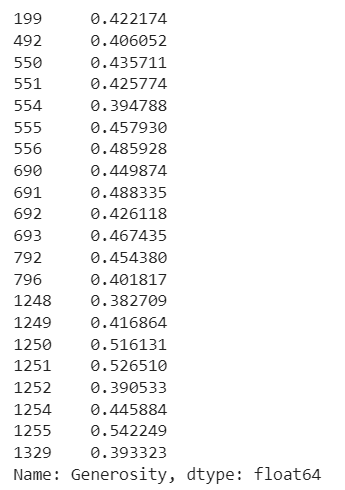

In [ ]:
max(happiness["year"])

2016.0

In [ ]:
top_gdp_countries = happiness[happiness['year']==2016].sort_values('Log GDP per capita',ascending=False).head(20)

In [ ]:
top_gdp_countries

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
745,2016.0,6.967341,11.459249,0.941261,72.897324,0.882365,0.003843,0.356336,0.757950,0.192301,...,0.425100,0.459828,1.389065,0.199368,0.361912,0.317611,0.311804,0.156507,Luxembourg,LUX
1114,2016.0,6.033481,11.300004,0.925128,76.408699,0.903736,0.124826,0.047311,0.823989,0.110942,...,0.746689,1.197774,1.302088,0.215810,0.281287,0.283598,0.428277,0.245686,Singapore,SGP
1324,2016.0,6.830950,11.111089,0.849380,68.510361,0.949120,0.105394,0.392265,0.775128,0.244668,...,0.469023,1.501519,2.145560,0.314094,0.337900,0.338733,0.531381,0.297912,United Arab Emirates,ARE
678,2016.0,5.947195,11.089805,0.845222,65.223953,0.840967,-0.113090,0.825599,0.688287,0.314923,...,-0.789108,-0.704261,2.360634,0.396932,0.375008,0.315193,0.538839,0.269758,Kuwait,KWT
943,2016.0,7.596332,11.068572,0.959743,70.784592,0.954352,0.105539,0.409666,0.849626,0.209262,...,0.274520,0.834465,1.579265,0.207898,0.299740,0.277978,0.349659,0.184139,Norway,NOR
1208,2016.0,7.458520,10.917511,0.927628,72.957100,0.933947,0.078058,0.301563,0.779471,0.206317,...,-0.186255,0.109330,1.694410,0.227178,0.317186,0.329300,0.510793,0.214831,Switzerland,CHE
584,2016.0,7.040731,10.901153,0.958144,71.404068,0.874589,0.171786,0.398544,0.809203,0.211063,...,0.231180,1.257086,1.843073,0.261773,0.382933,0.325633,0.365785,0.282744,Ireland,IRL
519,2016.0,5.498421,10.898263,0.832078,75.999695,0.799743,0.081646,0.402813,0.664093,0.213115,...,0.942431,1.342383,1.819238,0.330866,0.321467,0.318949,0.513229,0.208592,Hong Kong,HKG
1346,2016.0,6.803600,10.879706,0.896751,70.125351,0.757893,0.128053,0.738920,0.805674,0.264204,...,0.907648,0.831310,1.972203,0.289876,0.456650,0.408700,0.693315,0.313039,United States,USA
1075,2016.0,6.473921,10.822869,0.889932,63.850861,0.774268,-0.157678,0.760304,0.792999,0.266293,...,-0.428949,-0.169784,2.070085,0.319757,0.405420,0.411100,0.582818,0.312896,Saudi Arabia,SAU


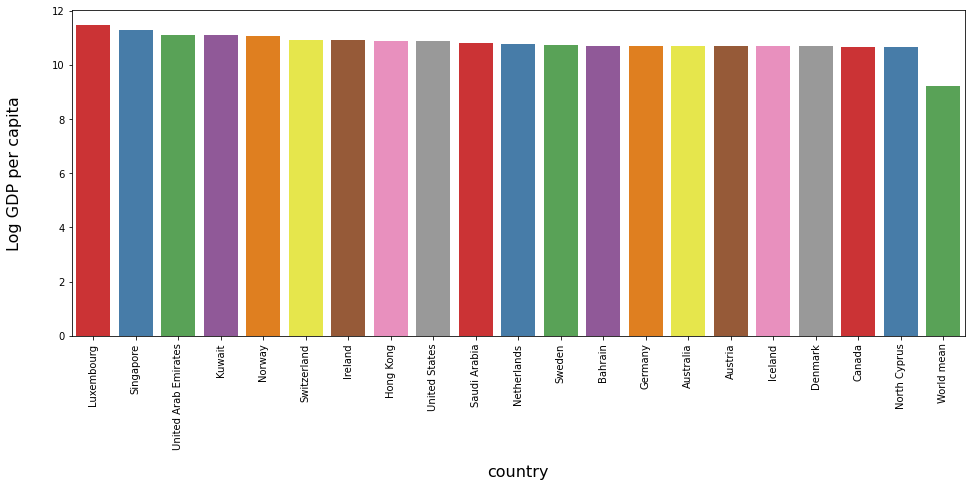

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
mean = pd.DataFrame({'country':['World mean'], 'Log GDP per capita':[happiness['Log GDP per capita'].mean()]})
gdps = pd.concat([top_gdp_countries[['country','Log GDP per capita']],mean],ignore_index=True)

sn.barplot(x='country',y='Log GDP per capita',data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

## Observed:
- Luxembourg has the most log gdp per capita whereas US stands on 9th position
- Mean of log gdp per capita is near 10 

In [ ]:
happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
0,2008.0,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,...,-1.962724,-1.665877,1.774662,0.476600,0.2896,0.305000,0.441906,0.286315,Afghanistan,AFG
1,2009.0,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,...,-2.082451,-1.647945,1.722688,0.391362,0.2896,0.305000,0.441906,0.286315,Afghanistan,AFG
2,2010.0,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,...,-2.015700,-1.630097,1.878622,0.394803,0.2896,0.305000,0.327318,0.275833,Afghanistan,AFG
3,2011.0,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,...,-1.943686,-1.620443,1.785360,0.465942,0.2896,0.305000,0.336764,0.255229,Afghanistan,AFG
4,2012.0,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,...,-1.855898,-1.435541,1.798283,0.475367,0.2896,0.305000,0.344540,0.234625,Afghanistan,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,2012.0,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,...,-1.117682,-1.477044,1.853195,0.373997,0.5462,0.516475,0.487203,0.148151,Zimbabwe,ZWE
1416,2013.0,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,...,-1.031373,-1.471021,1.964805,0.418918,0.5462,0.516475,0.555439,0.148151,Zimbabwe,ZWE
1417,2014.0,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,...,-0.962947,-1.468772,2.079248,0.496899,0.5462,0.516475,0.601080,0.148151,Zimbabwe,ZWE
1418,2015.0,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,...,-0.962947,-1.468772,2.198865,0.593776,0.5462,0.516475,0.655137,0.148151,Zimbabwe,ZWE


In [ ]:
happiness.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup', 'country', 'code'],
      dtype='object')

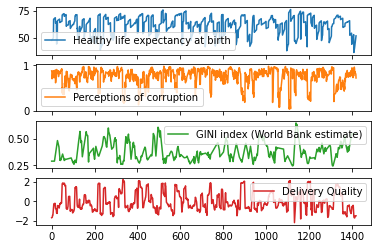

In [ ]:
data_plot = happiness.loc[:,["Healthy life expectancy at birth","Perceptions of corruption", "GINI index (World Bank estimate)","Delivery Quality" ]]
data_plot.plot(subplots = True);

## Observed: 
- Factors with respect to countries
- Gini index is fluctuaing very much but maintains a high value
- Whereas life expectancy at birth decreased drastically
- Perceptions of corruption is most stable among other factors

















































































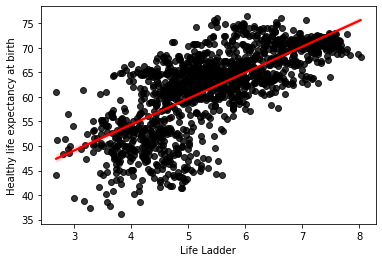

In [ ]:
sns.regplot(data = happiness, x = "Life Ladder", y = "Healthy life expectancy at birth", scatter_kws={"color": "black"}, line_kws={"color": "red"})

## Observed: 
- High correlation is present between life ladder and life expectancy 
- The correlation is strong positive and linear
- corr = 0.75
- People having more life expectancy at birth have best possible life

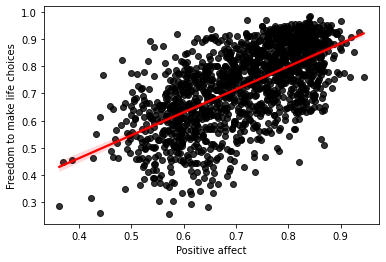

In [ ]:
sns.regplot(data = happiness,x = "Positive affect", y = "Freedom to make life choices", scatter_kws={"color": "black"}, line_kws={"color": "red"})


## Observed: 
- High correlation is present between Positive affect and freedom to make life choices
- The correlation is strong positive and linear
- corr = 0.62
- People with freedom to make choice have positive affect towards other people

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



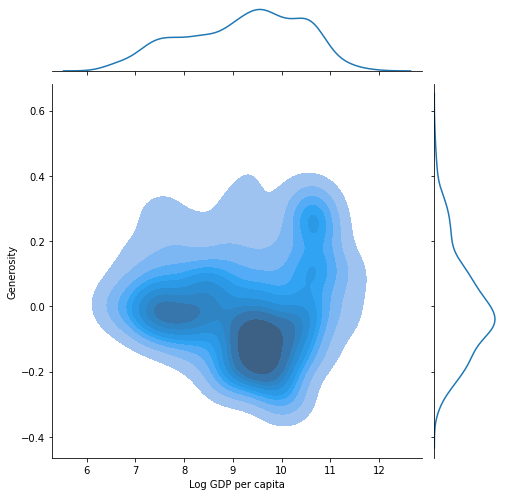

In [ ]:
sn.jointplot(happiness["Log GDP per capita"], happiness["Generosity"], kind = "kde", height = 7,shade=True)
plt.show()

## Observed: 
- Log GDP per capita between 9 to 10 and generosity between -0.2 to 0 have more density 

In [ ]:
happiness.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup', 'country', 'code'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



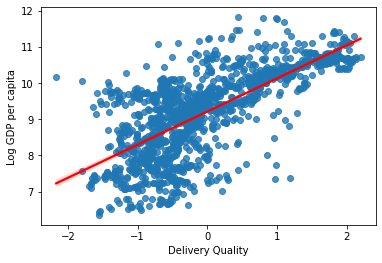

In [ ]:
sn.regplot('Delivery Quality', 'Log GDP per capita',data = happiness,line_kws={"color": "red"})
plt.show()

## Observed: 
- Delivery quality and log gdp per capita have a strong positive correlation
- But most values are below the regression line

In [ ]:
import plotly.express as px
data = happiness[happiness["year"]==2013]

In [ ]:
fig = px.histogram(data, x=data["Confidence in national government"])
fig.show()

In [ ]:
happiness.loc[(happiness['Confidence in national government']>0.35) & (happiness['Confidence in national government']<0.39)]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
13,2012.0,5.510124,9.189353,0.784502,68.025116,0.601512,-0.168962,0.847675,0.606636,0.271393,...,-0.080255,-0.351305,1.921203,0.348668,0.289600,0.305000,0.568153,0.072323,Albania,ALB
18,2010.0,5.463567,9.464850,0.724323,63.553486,0.592696,-0.231348,0.618038,0.612724,0.288301,...,-1.144719,-0.719720,1.626279,0.297659,0.358529,0.333067,0.492713,0.100844,Algeria,DZA
31,2010.0,6.441067,9.729388,0.926799,66.545967,0.730258,-0.116924,0.854695,0.846136,0.210975,...,0.121494,-0.495694,2.107838,0.327250,0.445000,0.479421,0.366742,0.228952,Argentina,ARG
36,2015.0,6.697131,9.070609,0.926492,67.291908,0.881224,-0.198988,0.850906,0.858544,0.305355,...,-0.047209,-0.542091,1.953587,0.291705,0.373850,0.479421,0.346246,0.192798,Argentina,ARG
39,2007.0,4.881516,8.836584,0.759644,64.414207,0.605411,-0.235378,0.817445,0.507101,0.411717,...,-0.324285,-0.300555,1.709413,0.350181,0.298300,0.325923,0.379824,0.171106,Armenia,ARM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,2008.0,7.280386,10.827426,0.952587,69.148506,0.877956,0.238272,0.668495,0.871968,0.226823,...,0.840077,1.541801,1.778600,0.244300,0.413200,0.408700,0.625009,0.369580,United States,USA
1341,2011.0,7.115139,10.815405,0.921705,69.682312,0.863202,0.144549,0.696926,0.836360,0.273379,...,0.854799,1.457954,1.945976,0.273498,0.406600,0.408700,0.612990,0.354259,United States,USA
1375,2013.0,6.552796,9.780734,0.896301,64.327782,0.641965,-0.238347,0.837300,0.839730,0.237609,...,-1.008755,-1.462015,2.474761,0.377665,0.412400,0.497117,0.275068,0.184169,Venezuela,Venezuela
1393,2011.0,3.746256,8.193192,0.662680,53.201420,0.638211,-0.167400,0.753882,0.502691,0.284863,...,-1.914154,-1.098414,2.313261,0.617486,0.477971,0.358900,0.412353,0.277646,Yemen,YEM


In [ ]:
happiness[(happiness['Confidence in national government'] >0.95)]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
129,2013.0,5.569092,8.877316,0.818949,59.956951,0.810201,0.361087,0.802428,0.778723,0.217350,...,0.308521,0.081932,1.283989,0.230556,0.523933,0.487367,0.359662,0.186310,Bhutan,BTN
130,2014.0,4.938578,8.916817,0.880342,60.276520,0.834222,0.276351,0.650338,0.858864,0.324098,...,0.429826,0.220767,0.991039,0.200673,0.538856,0.487367,0.471104,0.179262,Bhutan,BTN
1108,2009.0,6.144677,11.060538,0.866255,74.389771,0.776382,-0.093514,0.035198,0.499599,0.207548,...,0.452483,1.984108,1.453645,0.236570,0.306407,0.335919,0.325021,0.206153,Singapore,SGP


## Observed: 
- 20 countries have 0.35 to 3.9 confidence in national government 
- Above dataframe show how may countries have confidence in national government
- Bhutan and Singapore have the highest confidence in national government with gpd between 8 to 11

In [ ]:
fig = px.histogram(data, x=data["Social support"])
fig.show()

In [ ]:
happiness.loc[(happiness['Confidence in national government']>0.85) & (happiness['Confidence in national government']<1)]

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup",country,code
129,2013.0,5.569092,8.877316,0.818949,59.956951,0.810201,0.361087,0.802428,0.778723,0.217350,...,0.308521,0.081932,1.283989,0.230556,0.523933,0.487367,0.359662,0.186310,Bhutan,BTN
130,2014.0,4.938578,8.916817,0.880342,60.276520,0.834222,0.276351,0.650338,0.858864,0.324098,...,0.429826,0.220767,0.991039,0.200673,0.538856,0.487367,0.471104,0.179262,Bhutan,BTN
131,2015.0,5.082129,8.936084,0.847574,60.596088,0.830102,0.288096,0.633956,0.809641,0.311589,...,0.018714,-0.232398,1.474847,0.290203,0.553778,0.487367,0.422514,0.172215,Bhutan,BTN
153,2008.0,5.451147,9.519134,0.831905,52.109760,0.857776,-0.173062,0.806226,0.731180,0.217886,...,0.734843,0.672559,2.402703,0.440770,0.461511,0.625950,0.536359,0.098533,Botswana,BWA
1105,2006.0,6.462703,11.086706,0.904329,73.382545,0.756874,0.118960,0.463440,0.750798,0.266721,...,0.420143,1.940587,1.297670,0.200794,0.318967,0.362080,0.587362,0.190404,Singapore,SGP
1106,2007.0,6.833755,11.132247,0.920632,73.657242,0.866892,0.273620,0.063615,0.700188,0.114407,...,0.398107,2.022359,1.306152,0.191132,0.314780,0.353360,0.499915,0.195654,Singapore,SGP
1107,2008.0,6.641957,11.096750,0.845259,73.976608,0.660659,0.026355,0.065775,0.720842,0.256087,...,0.497403,2.055469,1.534524,0.231035,0.310593,0.344639,0.412468,0.200903,Singapore,SGP
1108,2009.0,6.144677,11.060538,0.866255,74.389771,0.776382,-0.093514,0.035198,0.499599,0.207548,...,0.452483,1.984108,1.453645,0.236570,0.306407,0.335919,0.325021,0.206153,Singapore,SGP
1109,2010.0,6.531402,11.184670,0.864162,74.664474,0.846185,-0.037934,0.060282,0.602476,0.131343,...,0.470461,1.987867,1.481479,0.226824,0.302220,0.327199,0.436413,0.329020,Singapore,SGP
1111,2013.0,6.533207,11.265057,0.807911,75.309906,0.827103,0.095178,0.242398,0.769633,0.147688,...,0.702851,1.965553,1.518779,0.232471,0.293847,0.309759,0.460228,0.295686,Singapore,SGP


## Observed: 
- Amost 31 countries have a great social support count
- Where Bhutan, Vietnam and singapore are countries with most social support over years